In [1]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [3]:
n_data = torch.ones(100, 2)
x0 = torch.normal(2*n_data, 1)     # class0 x data (tensor), shape=(100, 2)
y0 = torch.zeros(100)              # class0 y data (tensor), shape=(100, 1)
x1 = torch.normal(-2*n_data, 1)    # class1 x data (tensor), shape=(100, 1)
y1 = torch.ones(100)               # class1 y data (tensor), shape=(100, 1)
x = torch.cat((x0, x1), 0).type(torch.FloatTensor)
y = torch.cat((y0, y1), ).type(torch.LongTensor)

x, y = Variable(x), Variable(y)

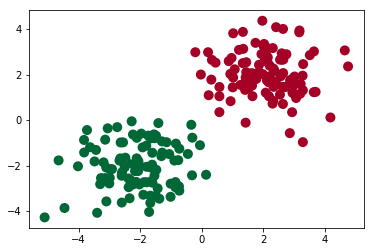

In [4]:
plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=y.data.numpy(), s=100, lw=0, cmap='RdYlGn')
plt.show()

In [5]:
# method 1
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)
        self.predict = torch.nn.Linear(n_hidden, n_output)
        
    def forward(self, x):
        x = F.relu(self.hidden(x))
        x = self.predict(x)
        return x

In [12]:
net1 = Net(2, 10, 2)
print(net1)

Net(
  (hidden): Linear(in_features=2, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=2, bias=True)
)


In [11]:
# method 2
net2 = torch.nn.Sequential(
    torch.nn.Linear(2, 10),
    torch.nn.ReLU(),
    torch.nn.Linear(10, 2),
)
print(net2)

Sequential(
  (0): Linear(in_features=2, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=2, bias=True)
)


In [9]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.02)
loss_func = torch.nn.CrossEntropyLoss()
plt.ion()

D:\anaconda\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  # Remove the CWD from sys.path while we load stuff.


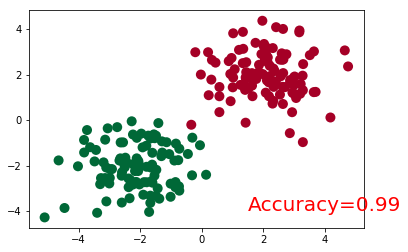

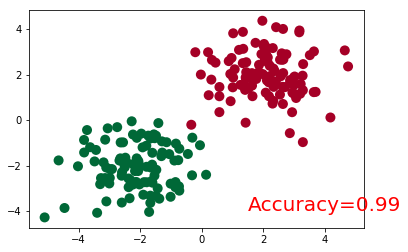

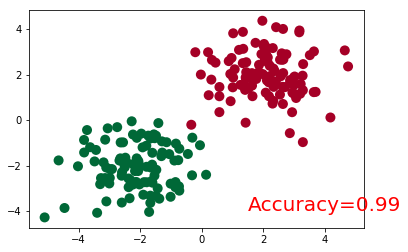

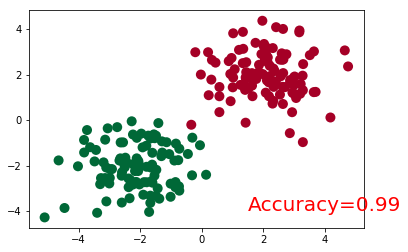

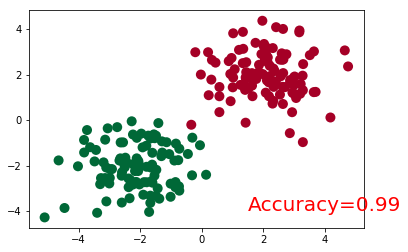

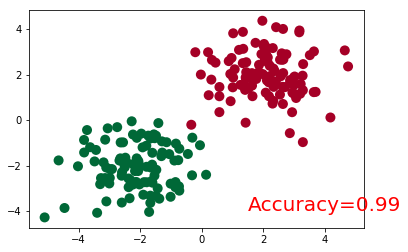

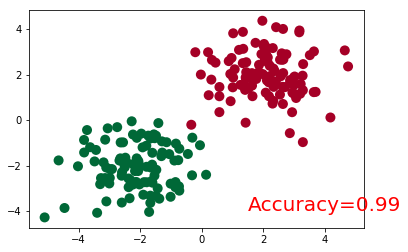

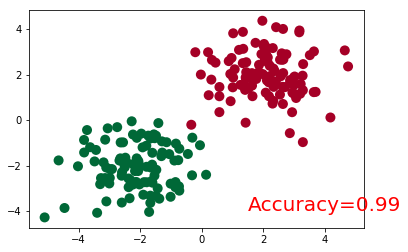

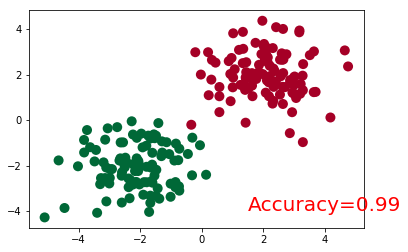

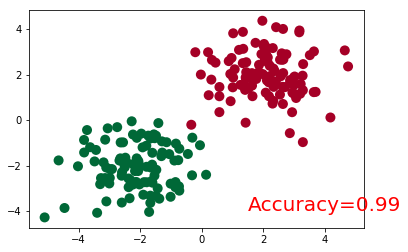

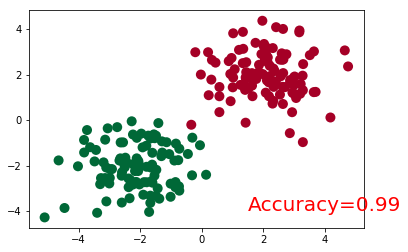

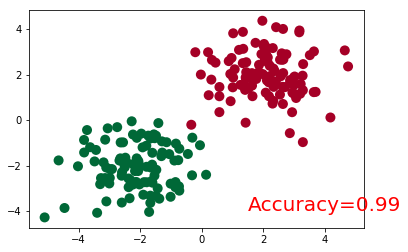

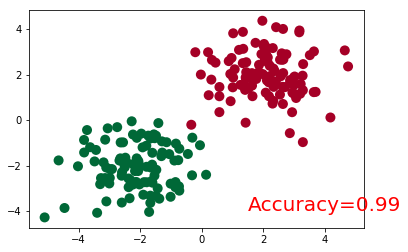

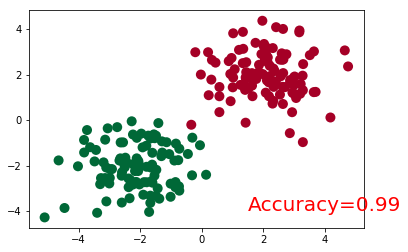

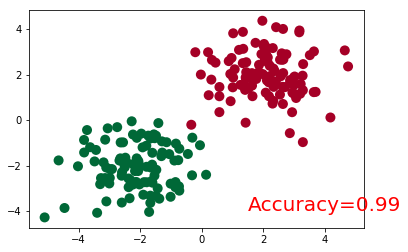

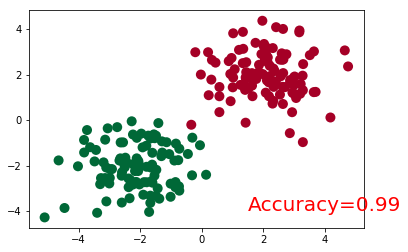

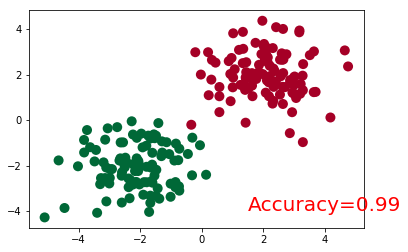

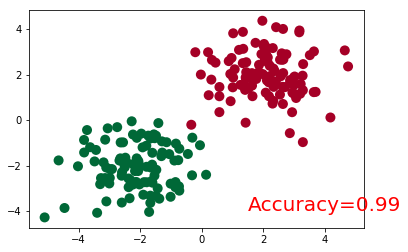

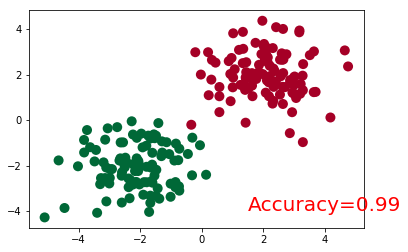

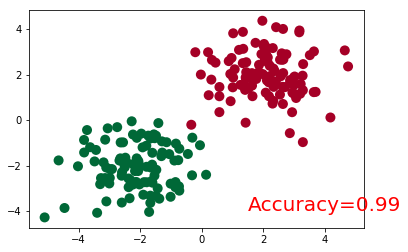

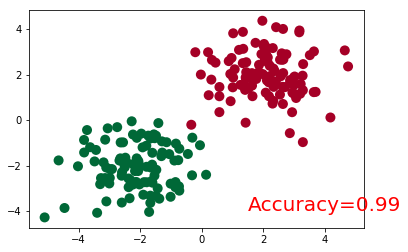

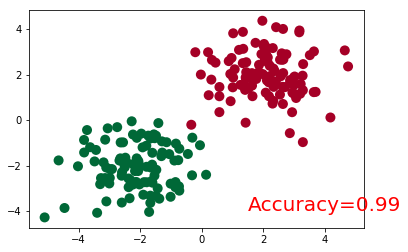

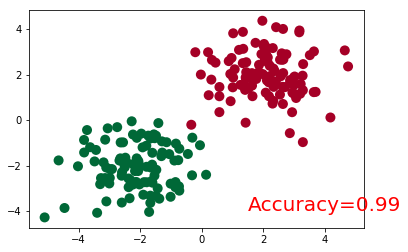

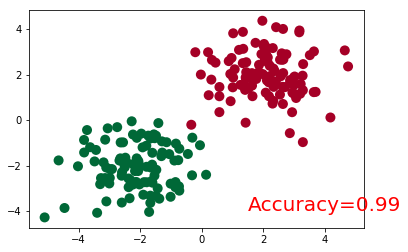

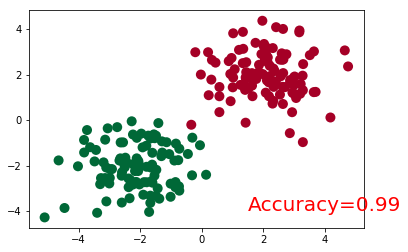

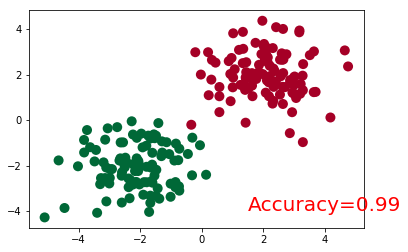

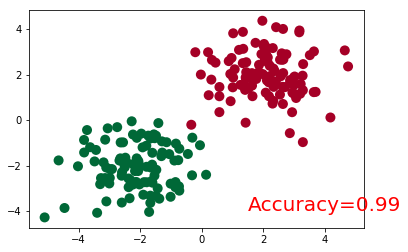

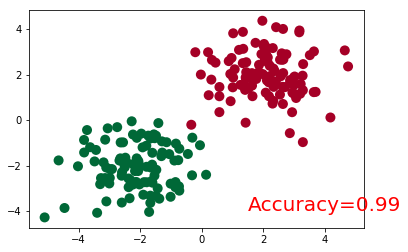

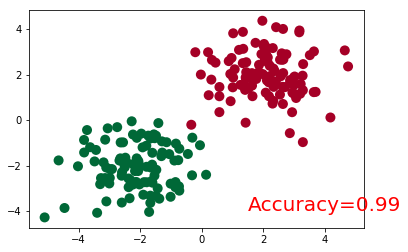

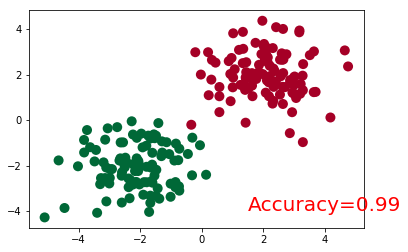

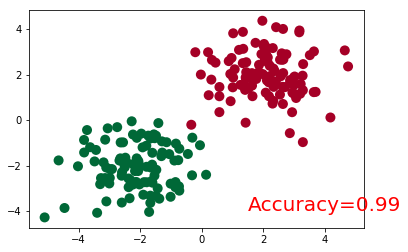

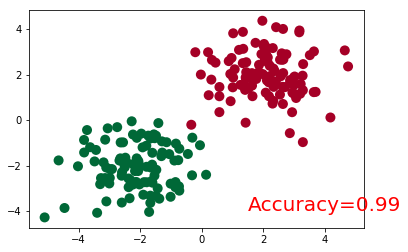

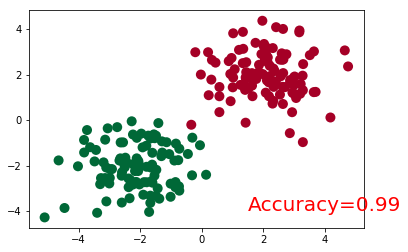

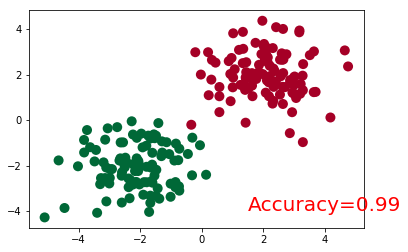

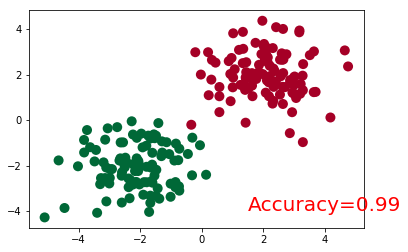

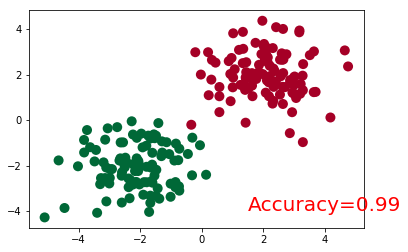

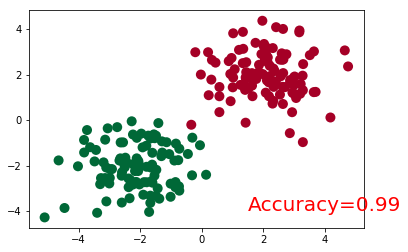

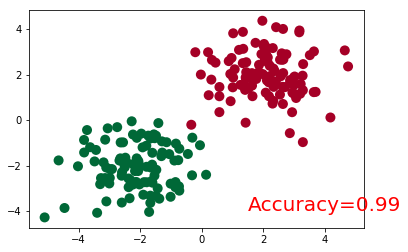

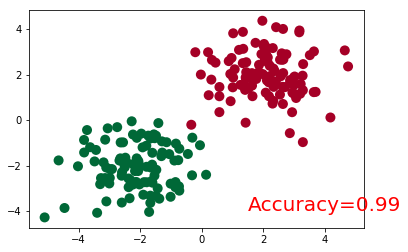

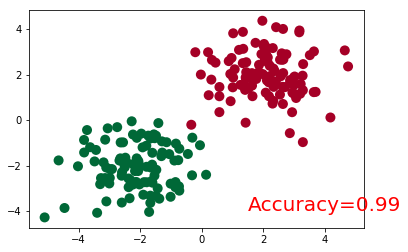

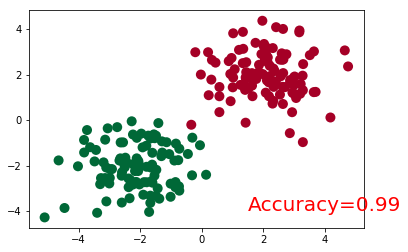

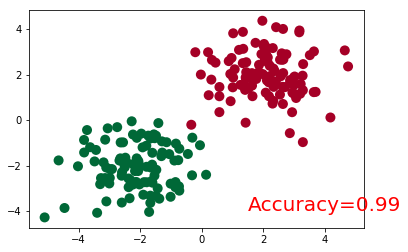

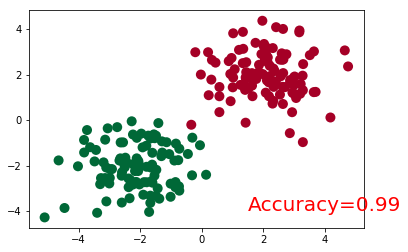

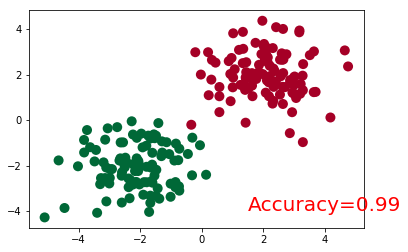

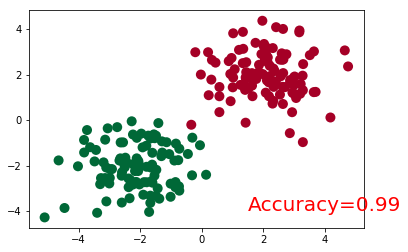

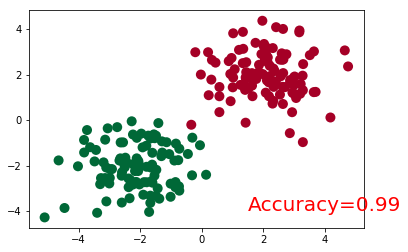

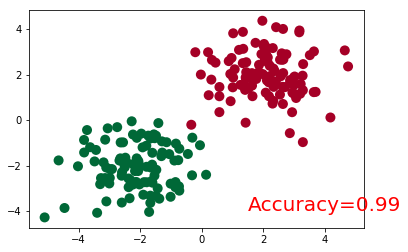

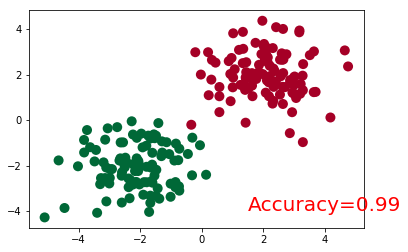

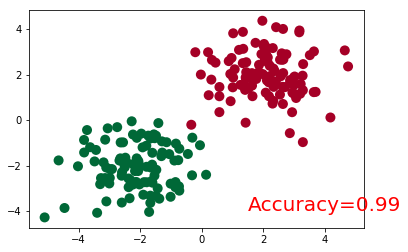

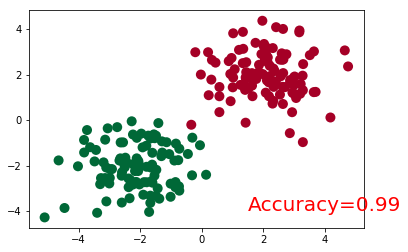

In [10]:
for t in range(100):
    out = net(x)
    loss = loss_func(out, y)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if t%2 == 0:
        plt.cla()
        prediction = torch.max(F.softmax(out), 1)[1]
        pred_y = prediction.data.numpy()
        target_y = y.data.numpy()
        plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=pred_y, s=100, lw=0, cmap='RdYlGn')
        accuracy = float((pred_y == target_y).astype(int).sum()) / float(target_y.size)
        plt.text(1.5, -4, 'Accuracy=%.2f' % accuracy, fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)

plt.ioff()
plt.show()